# Load Data

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/GDSimpson3/ML-datasets/refs/heads/main/Salary_dataset.csv")

df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## Visualise Data

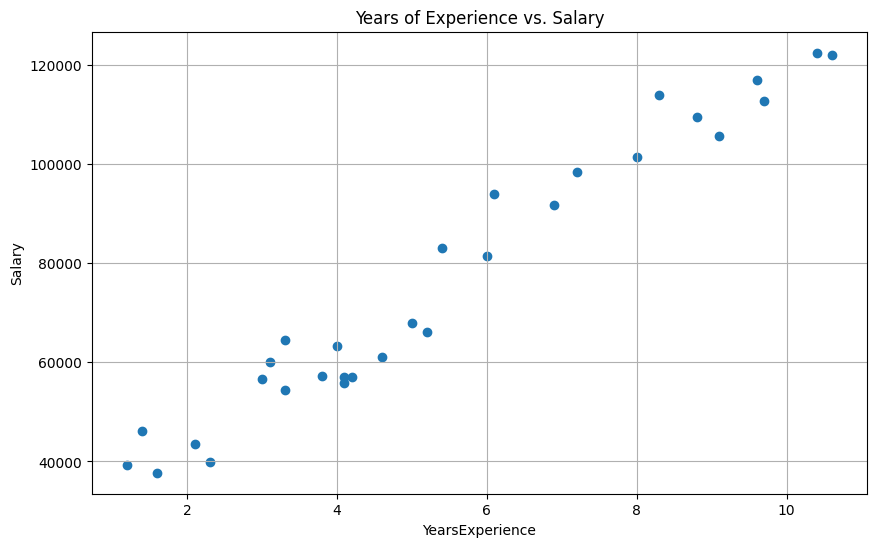

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Years of Experience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

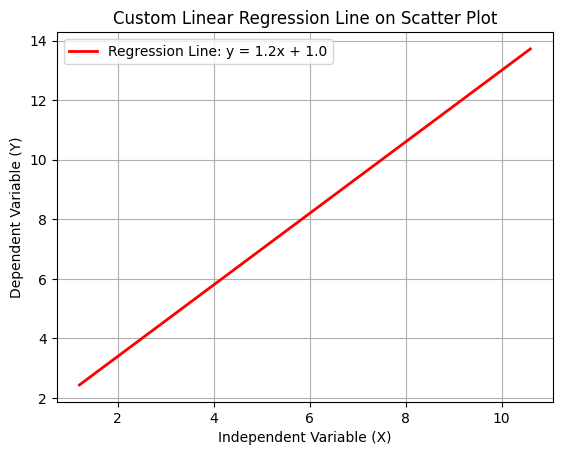

In [ ]:
import numpy as np

b = 1.0  # The y-intercept
m = 1.2  # The slope

X_line = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100) # Creates 100 evenly spaced points

# 4. Calculate the predicted Y-values (the regression line)
Y_pred = b + m * X_line

plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: y = {m}x + {b}')

# Add titles and labels
plt.title('Custom Linear Regression Line on Scatter Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.legend()
plt.grid(True)
plt.show()

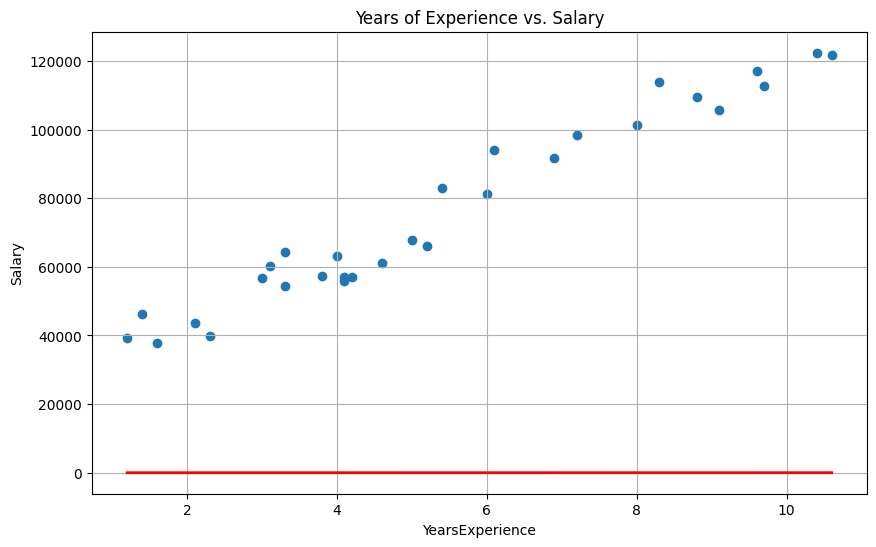

In [ ]:
b = 1.0  # The y-intercept
m = 1.2  # The slope

X_line = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100) # Creates 100 evenly spaced points

# 4. Calculate the predicted Y-values (the regression line)
Y_pred = b + m * X_line


plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: y = {m}x + {b}')

plt.title('Years of Experience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
def Plot(m,b):
  b = b  # The y-intercept
  m = m  # The slope

  X_line = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100) # Creates 100 evenly spaced points

  # 4. Calculate the predicted Y-values (the regression line)
  Y_pred = b + m * X_line


  plt.figure(figsize=(10, 6))
  plt.scatter(df['YearsExperience'], df['Salary'])
  plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: y = {m}x + {b}')

  plt.title('Years of Experience vs. Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()

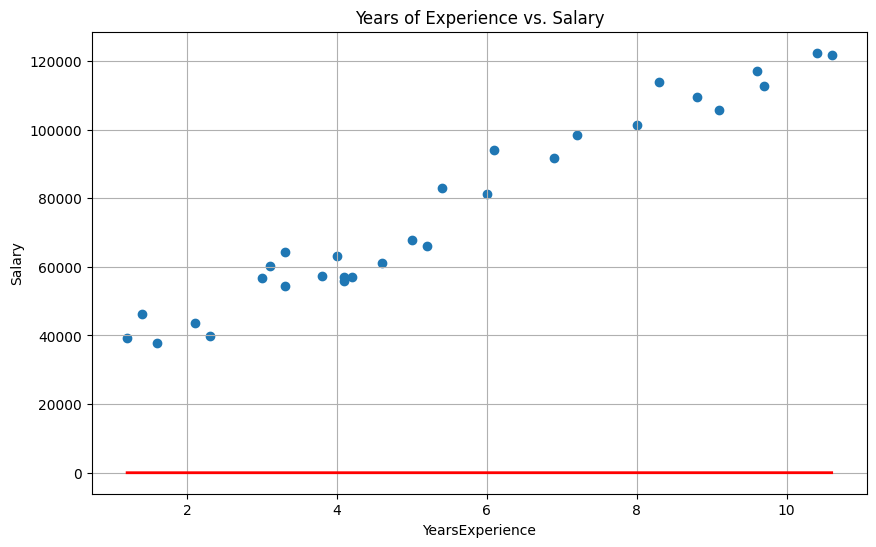

In [ ]:
Plot(1,1)

# MSE

In [ ]:
def MSE(m,b):
  X_YearsOfExperience = df['YearsExperience']
  Y_Salary = df['Salary']

  SummationOfErrors = 0

  for i in range(len(Y_Salary)):

    ObservedValue = Y_Salary[i]

    Predicted = (m * X_YearsOfExperience[i]) + b

    Error = (Predicted - ObservedValue) ** 2

    SummationOfErrors = SummationOfErrors + Error

  return SummationOfErrors / len(Y_Salary)

In [ ]:
print(MSE(1,1))

6501985309.822665


# Partial Derivatives

In [ ]:
def PartialDerivativeOfM(m,b):
  X_YearsOfExperience = df['YearsExperience']
  Y_Salary = df['Salary']

  SummationOfErrors = 0

  for i in range(len(Y_Salary)):

    ObservedValue = Y_Salary[i]

    Predicted = (m * X_YearsOfExperience[i]) + b

    Error = (Predicted - ObservedValue) * X_YearsOfExperience[i]

    SummationOfErrors = SummationOfErrors + Error

  return (2 * (SummationOfErrors / len(Y_Salary)))

In [ ]:
def PartialDerivativeOfB(m,b):
  X_YearsOfExperience = df['YearsExperience']
  Y_Salary = df['Salary']

  SummationOfErrors = 0

  for i in range(len(Y_Salary)):

    ObservedValue = Y_Salary[i]

    Predicted = (m * X_YearsOfExperience[i]) + b

    Error = (Predicted - ObservedValue)

    SummationOfErrors = SummationOfErrors + Error

  return (2 * (SummationOfErrors / len(Y_Salary)))

# The Gradient Descent

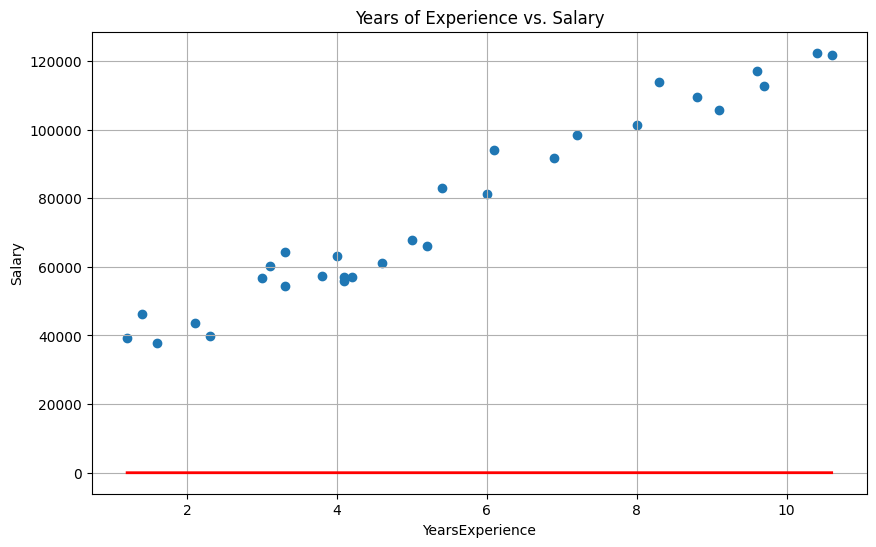

After 1000 iterations, M: 9504.446687924194, B: 24477.00655470571 -- MSE: 31299877.19830564


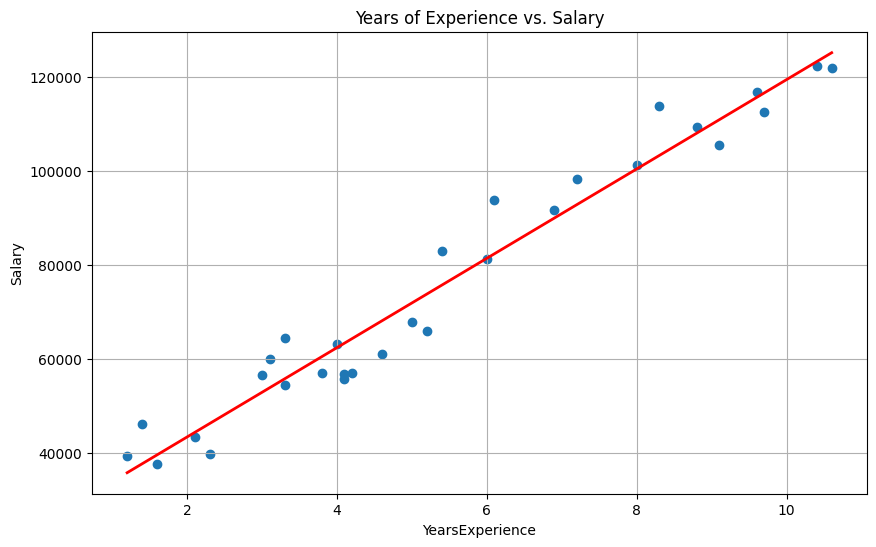

In [ ]:
alpha = 0.01

m = 1
b = 1

maxIterations = 1000

Plot(m,b)

mse_History = [MSE(m,b)]

for i in range(maxIterations):
  m = m - (alpha * PartialDerivativeOfM(m,b))
  b = b - (alpha * PartialDerivativeOfB(m,b))

  mse_History.append(MSE(m,b))

print(f'After {maxIterations} iterations, M: {m}, B: {b} -- MSE: {MSE(m,b)}')

Plot(m,b)

# Metrics

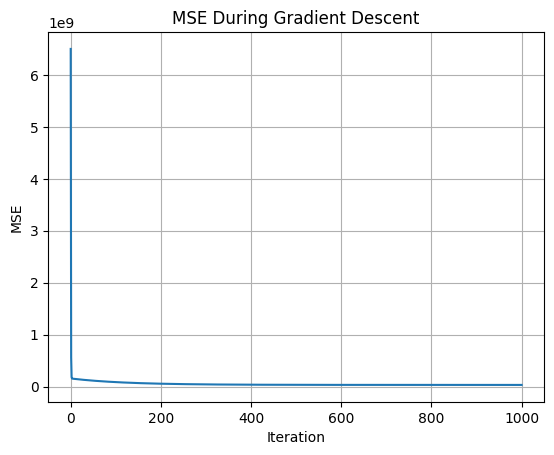

In [ ]:
plt.plot(mse_History)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE During Gradient Descent")
plt.grid(True)
plt.show()

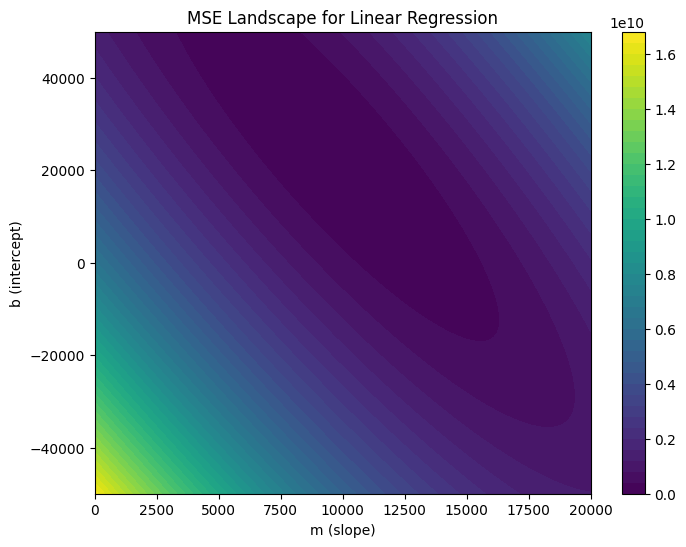

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = df['YearsExperience'].values
Y = df['Salary'].values

# Range of m and b values to explore
m_values = np.linspace(0, 20000, 200)
b_values = np.linspace(-50000, 50000, 200)

M, B = np.meshgrid(m_values, b_values)
MSE = np.zeros_like(M)

# Compute MSE for each (m, b) pair
for i in range(len(m_values)):
    for j in range(len(b_values)):
        Y_pred = M[j, i] * X + B[j, i]
        MSE[j, i] = np.mean((Y - Y_pred) ** 2)

# Create contour plot
plt.figure(figsize=(8, 6))
cp = plt.contourf(M, B, MSE, levels=50)
plt.colorbar(cp)
plt.xlabel('m (slope)')
plt.ylabel('b (intercept)')
plt.title('MSE Landscape for Linear Regression')
plt.show()